In [21]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 100
%matplotlib inline
pd.set_option("display.max_rows", 101)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [22]:
# Levantamos el dataset
propiedades_prediction = pd.read_pickle('propiedades_prediction.pkl')
propiedades = pd.read_pickle('propiedades.pkl')

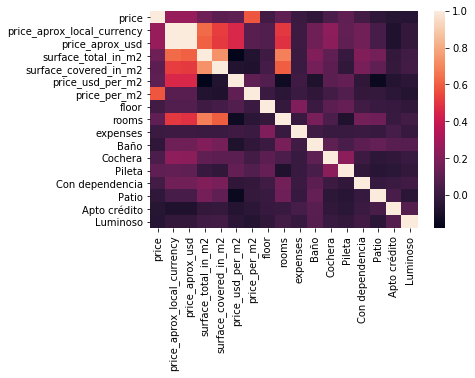

In [23]:
# Usamos todas las features para un heatmap
sns.heatmap(propiedades.corr())

In [24]:
# Obtenemos el nombre de todos los features
feature_cols = propiedades_prediction.dtypes.index 
feature_cols

Index(['place_name_Agronomía', 'place_name_Almagro', 'place_name_Balvanera',
       'place_name_Barracas', 'place_name_Barrio Norte', 'place_name_Belgrano',
       'place_name_Boca', 'place_name_Boedo', 'place_name_Caballito',
       'place_name_Capital Federal', 'place_name_Catalinas',
       'place_name_Centro / Microcentro', 'place_name_Chacarita',
       'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
       'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
       'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
       'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
       'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
       'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
       'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
       'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
       'place_name_Parque Chas', 'place_name_Parque Pat

(10759, 74) (10759,)
(10760, 74) (10760,)


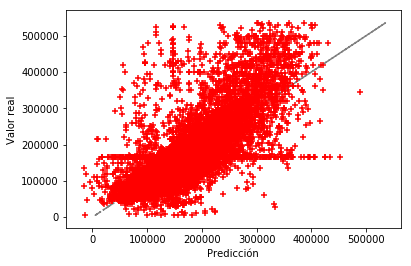

EMC: 4220014008.399447
Intercept = 10749.024116045213
RMSE =  [-1.67737864e+04  9.76301723e+03 -7.31573579e+03 -4.22287777e+03
  5.96479525e+04  5.79832229e+04 -2.25870615e+04  8.00177630e+04
  2.17524715e+04  8.70830870e+03  7.73745272e+04  3.69419160e+03
  1.66035434e+04  1.84423137e+04  2.86901750e+04 -9.04168371e+03
 -2.91486281e+04 -2.17091535e+03 -1.74332250e+04  9.27927285e+04
  4.87793284e+03 -6.50280217e+03 -4.30477657e+03  1.49693187e+04
  5.26542808e+04 -1.00148182e+04  6.84906942e+04  6.65907747e+04
  5.58252810e+04  5.04519197e+04  5.39810527e+04 -1.77440335e+04
  1.36610546e+04 -1.23239425e+04  4.73180794e+03 -9.22769811e+03
 -1.68485640e+03 -4.20331633e+04  1.69978838e+05  7.95166795e+04
  5.19594157e+04  1.65788193e+04  2.23617584e+04  6.97383002e+03
 -9.52041906e+02 -6.83543251e+03  2.43268406e+04  1.04511909e+04
  1.84763069e+04  2.44945080e+04  6.98266720e+03 -4.41036543e+04
  2.18373201e+04 -1.44090396e+02  2.85555024e+03 -1.68355479e+04
 -4.41043064e+04  2.64065230

In [44]:
from sklearn.linear_model import LinearRegression
X =  propiedades_prediction[feature_cols]
y = propiedades.price_aprox_usd
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

linreg = LinearRegression()
modelo = linreg.fit(X_train, y_train)
prediccion = linreg.predict(X_test)

# Grafico
plt.plot(y,y, '-.',c='grey')
plt.scatter(prediccion, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

print ("EMC:", mean_squared_error(y_test, prediccion))
print ('Intercept =', modelo.intercept_)
print ('RMSE = ', modelo.coef_)
print ('R2 =', modelo.score(X_test, y_test))


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [46]:
# Generamos un grid de $\alpha$ para probar e instanciamos un particionador del Training Set 
# en K partes para realizar la validación cruzada
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

#al_ridge = np.linspace(0.001, 1, 100)
#al_lasso = np.linspace(0.001, 1, 100)
al_ridge = np.linspace(0.001, 0.3, 300)
al_lasso = np.linspace(0.1, 0.5, 300)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Instanciamos los modelos

lm = LinearRegression()
lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lm_lasso_cv = LassoCV(alphas=al_lasso, cv=kf, normalize=False)


scaler = StandardScaler()
lista_numericos = ['rooms']
X_train[lista_numericos]= scaler.fit_transform(X_train[lista_numericos])
X_test[lista_numericos] = scaler.transform(X_test[lista_numericos])

lista_numericos2 = ['surface_total_in_m2']
X_train[lista_numericos2]= scaler.fit_transform(X_train[lista_numericos2])
X_test[lista_numericos2] = scaler.transform(X_test[lista_numericos2])

# Aplicamos PCA
# pca=PCA(n_components=2)
# pca.fit(X_train) # obtener los componentes principales
# X_pca=pca.transform(X_train) 
# X_train = X_pca

# Hacemos los fits respectivos
lm.fit(X_train, y_train)
lm_ridge_cv.fit(X_train, y_train)
lm_lasso_cv.fit(X_train, y_train)

print('Alpha Ridge:',lm_ridge_cv.alpha_,'\n'
      'Alpha LASSO:',lm_lasso_cv.alpha_,'\n')


a = lm_ridge_cv.alpha_
ridge_final = Ridge(a)
ridge_final.fit(X_train, y_train)

# Calculamos el R2
print("Score Train Lineal: %.2f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.2f\n" % lm_ridge_cv.score(X_train, y_train),
      "Score Train Lasso : %.2f\n" %  lm_lasso_cv.score(X_train, y_train))

# Calculamos el RMSE
y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_ridge = lm_ridge_cv.predict(X_train)
y_pred_tr_lasso = lm_lasso_cv.predict(X_train)

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))


print("Train RMSE lineal   : %.2f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,y_pred_tr_lasso))



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

Alpha Ridge: 0.3 
Alpha LASSO: 0.5 

Score Train Lineal: 0.54
 Score Train Ridge : 0.54
 Score Train Lasso : 0.54

Train RMSE lineal   : 66107.03 
 Train RMSE Ridge    : 66108.14 
 Train RMSE Lasso    : 66107.24 



In [47]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

y_pred_lm = lm.predict(X_test)
y_pred_ridge = lm_ridge_cv.predict(X_test)
y_pred_lasso = lm_lasso_cv.predict(X_test)

# Testeo final del modelo sobre Test Set
# Calculamos el R2
print("Score Test Lineal: %.2f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.2f\n" % lm_ridge_cv.score(X_test, y_test),
      "Score Test Lasso : %.2f\n" %  lm_lasso_cv.score(X_test, y_test))

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f" %  rmse(y_test, y_pred_lasso))

Score Test Lineal: 0.54
 Score Test Ridge : 0.54
 Score Test Lasso : 0.54

 Test RMSE lineal= 64961.48
 Test RMSE Ridge = 64959.08
 Test RMSE Lasso = 64959.29


In [48]:
# Agrego la columna de mis valores de predicción de Ridge al dataset
propiedades['price_aprox_usd_est'] = lm_ridge_cv.predict(X)
propiedades.head()

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,title,Baño,Cochera,Pileta,Con dependencia,Patio,Apto crédito,Luminoso,price_aprox_usd_est,error_est
0,PH,Mataderos,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,...,2 ambientes tipo casa sin expensas en pb,1,False,False,False,True,True,False,2.483343e+06,-2.421343e+06
2,apartment,Mataderos,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,...,2 ambientes 3er piso con ascensor apto credito,1,False,False,False,False,False,False,2.511811e+06,-2.439811e+06
3,PH,Liniers,95000.0,USD,1676227.5,95000.0,0.0,NaN,NaN,NaN,...,ph 3 ambientes cfte. reciclado,0,False,False,False,True,False,False,1.741251e+05,-7.912512e+04
7,apartment,Belgrano,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,...,jose hernandez 1400 monoambiente estrenar cat...,1,False,True,False,False,False,True,2.166976e+06,-2.028976e+06
8,apartment,Belgrano,195000.0,USD,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,...,"jose hernandez 1400 dos ambientes estrenar ,...",1,False,True,False,False,False,True,3.040061e+06,-2.845061e+06


In [49]:
# Agregamos una columna en el dataset de la diferencia entre el precio de la predicción y el del dataset
propiedades['error_est'] = propiedades['price_aprox_usd'] - propiedades['price_aprox_usd_est']
propiedades.head()

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,title,Baño,Cochera,Pileta,Con dependencia,Patio,Apto crédito,Luminoso,price_aprox_usd_est,error_est
0,PH,Mataderos,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,...,2 ambientes tipo casa sin expensas en pb,1,False,False,False,True,True,False,2.483343e+06,-2.421343e+06
2,apartment,Mataderos,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,...,2 ambientes 3er piso con ascensor apto credito,1,False,False,False,False,False,False,2.511811e+06,-2.439811e+06
3,PH,Liniers,95000.0,USD,1676227.5,95000.0,0.0,NaN,NaN,NaN,...,ph 3 ambientes cfte. reciclado,0,False,False,False,True,False,False,1.741251e+05,-7.912512e+04
7,apartment,Belgrano,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,...,jose hernandez 1400 monoambiente estrenar cat...,1,False,True,False,False,False,True,2.166976e+06,-2.028976e+06
8,apartment,Belgrano,195000.0,USD,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,...,"jose hernandez 1400 dos ambientes estrenar ,...",1,False,True,False,False,False,True,3.040061e+06,-2.845061e+06


In [50]:
# Armo una cartera de 100 propiedades cualquiera
cartera = propiedades.sample(n=100,random_state=100)
cartera.head()

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,title,Baño,Cochera,Pileta,Con dependencia,Patio,Apto crédito,Luminoso,price_aprox_usd_est,error_est
35871,apartment,Recoleta,238000.0,USD,4199391.00,238000.0,88.0,88.0,NaN,2704.545455,...,venta 3 ambientes en recoleta !,1,False,False,False,False,False,False,4.026712e+06,-3.788712e+06
63270,apartment,Villa Urquiza,106000.0,USD,1870317.00,106000.0,39.0,39.0,NaN,2717.948718,...,venta 1 amb.c/ coch. opcional .venta villa urq...,1,True,False,False,False,False,False,1.860334e+06,-1.754334e+06
71783,apartment,Caballito,138700.0,USD,2447292.15,138700.0,47.0,40.0,2951.063830,3467.500000,...,departamento - caballito norte,0,False,False,False,False,False,False,2.197929e+06,-2.059229e+06
40624,apartment,Villa Crespo,155000.0,USD,2734897.50,155000.0,60.0,51.0,2583.333333,3039.215686,...,departamento en venta,1,True,False,False,False,True,False,2.782558e+06,-2.627558e+06
89419,apartment,Boca,105000.0,USD,1852672.50,105000.0,73.0,70.0,1438.356164,1500.000000,...,departamento - 4 ambientes - boca,1,False,False,False,False,False,False,3.283368e+06,-3.178368e+06


In [51]:
# Armo mi cartera ideal de 100 propiedades con el importe total de mi cartera de 100 propiedades

print("Importe total de mi cartera de 100 propiedades: ", cartera.price_aprox_usd.sum())
print ()
print ("Cartera de propiedades subvaluadas que puedo obtener por ese valor: ")
print ()

# Uso la columna de la diferencia y ordeno por la misma así con ese mismo importe tomo las propiedades más subvaluadas
# De esta manera obtengo un mejor rendimiento con ese mismo dinero
indice = 0
suma = 0
while suma < cartera.price_aprox_usd.sum():
  indice += 1
  suma += propiedades.sort_values(by='error_est')[['price_aprox_usd']].iloc[indice].values[0]
  print("Título: ", propiedades.sort_values(by='error_est').iloc[indice].title)
  print("Tipo: ", propiedades.sort_values(by='error_est').iloc[indice].property_type)
  print("Ubicación: ", propiedades.sort_values(by='error_est').iloc[indice].place_name)
  print("Precio: ", propiedades.sort_values(by='error_est').iloc[indice].price_aprox_usd)
  print ()
  

Importe total de mi cartera de 100 propiedades:  15373322.629999999

Cartera de propiedades subvaluadas que puedo obtener por ese valor: 

Título:  julieta lanteri 600 - puerto madero - capital federal
Tipo:  apartment
Ubicación:  Puerto Madero
Precio:  165000.0

Título:  virrey del pino 2036
Tipo:  apartment
Ubicación:  Belgrano
Precio:  165000.0

Título:  casa en lote propio
Tipo:  house
Ubicación:  Mataderos
Precio:  179000.0

Título:  departamento - caballito
Tipo:  apartment
Ubicación:  Caballito
Precio:  165000.0

Título:  3 ambientes con dependencia cochera doble
Tipo:  apartment
Ubicación:  Puerto Madero
Precio:  165000.0

Título:  casa - mataderos
Tipo:  house
Ubicación:  Mataderos
Precio:  145000.0

Título:  casa en lote propio a reciclar 
Tipo:  house
Ubicación:  Mataderos
Precio:  169000.0

Título:  casa 180m² con 2 plantas en beiro, francisco 100, argentina, capital federal, por u$s 183.000
Tipo:  house
Ubicación:  Capital Federal
Precio:  183000.0

Título:  casa
Tipo:  ho